In [1]:
import torch
from net import PINN
import matplotlib.pyplot as plt

In [2]:
t = 20.0
ts = torch.ones((64*64, 1)) * t
x = torch.linspace(0, 64, 64)
y = torch.linspace(0, 64, 64)
x, y = torch.meshgrid(x, y, indexing='xy')
x, y = x.reshape(-1, 1), y.reshape(-1, 1)
x = x.requires_grad_(True)
y = y.requires_grad_(True)

In [3]:
pinn = PINN(in_features=3, 
            out_features=2,
            n_units=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

In [4]:
pinn.load_state_dict(torch.load('./checkpoint/ns_incomp_10per.pth'))

<All keys matched successfully>

In [5]:
pred = pinn.forward(x, y, ts)

In [6]:
psi = pred[:, 0]
p = pred[:, 1]

In [7]:
ux = torch.autograd.grad(psi.sum(), y, create_graph=True)[0]
uy = -torch.autograd.grad(psi.sum(), x, create_graph=True)[0]

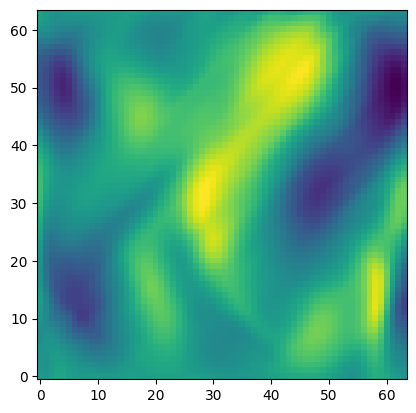

In [8]:
plt.imshow(uy.reshape(64, 64).detach().numpy(), origin='lower')